<a href="https://colab.research.google.com/github/PaulAndre1/fCC-projects/blob/main/Paul_fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import seaborn as sns

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-07-27 01:13:23--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2024-07-27 01:13:23 (3.75 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


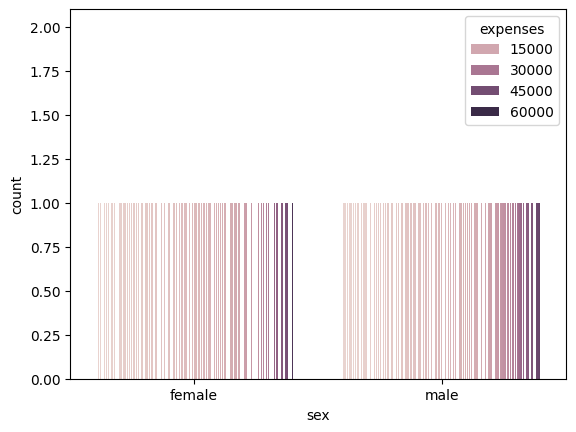

In [ ]:
sns.countplot(x='sex', hue='expenses', data=dataset)
plt.show()

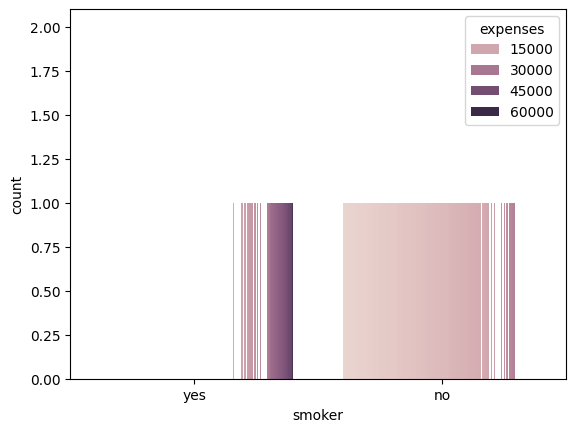

In [ ]:
sns.countplot(x='smoker', hue='expenses', data=dataset)
plt.show()

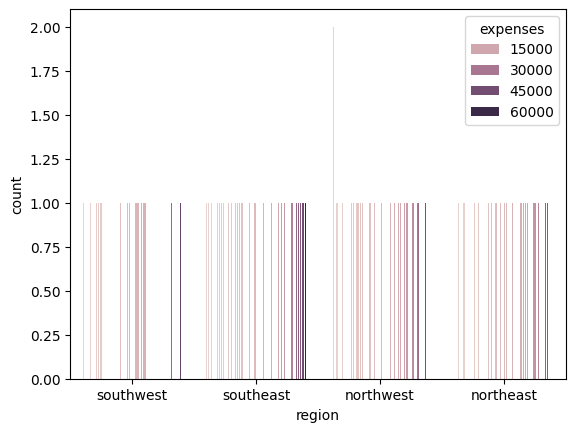

In [ ]:
sns.countplot(x='region', hue='expenses', data=dataset)
plt.show()

In [ ]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
map_region = {
    'southwest': 0,
    'southeast': 3,
    'northwest': 1,
    'northeast': 2
}
map_smoker = {
    'yes' : 1,
    'no' : 0
}

In [ ]:
dataset_encoded = dataset.copy()
dataset_encoded['region'] = dataset_encoded['region'].map(map_region)
dataset_encoded['smoker'] = dataset_encoded['smoker'].map(map_smoker)
dataset_encoded = pd.get_dummies(dataset_encoded, columns = ['sex'])
dataset_encoded = dataset_encoded.astype(float)

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset_encoded.drop('expenses', axis=1)
y = dataset_encoded['expenses']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

model = keras.Sequential([
    normalizer,
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.11),
    loss='mae', metrics=['mae', 'mse'])

In [ ]:
model.fit(X_train, y_train, epochs=100, validation_data = (X_test, y_test), batch_size= 64)

Epoch 1/100
17/17 [==============================] - 1s 19ms/step - loss: 12686.5703 - mae: 12686.5703 - mse: 304993088.0000 - val_loss: 10017.9951 - val_mae: 10017.9951 - val_mse: 244895840.0000
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 7638.5708 - mae: 7638.5708 - mse: 139539264.0000 - val_loss: 5424.6816 - val_mae: 5424.6816 - val_mse: 77613768.0000
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 4106.6997 - mae: 4106.6997 - mse: 55375884.0000 - val_loss: 3366.4031 - val_mae: 3366.4031 - val_mse: 38125960.0000
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 3470.5967 - mae: 3470.5967 - mse: 44610936.0000 - val_loss: 3183.0598 - val_mae: 3183.0598 - val_mse: 38471300.0000
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 3257.0891 - mae: 3257.0891 - mse: 39878464.0000 - val_loss: 2978.5210 - val_mae: 2978.5210 - val_mse: 35100876.0000
Epoch 6/100
17/17 [============================

In [ ]:
test_dataset = X_test
test_labels = y_test

9/9 - 0s - loss: 1877.5951 - mae: 1877.5951 - mse: 21926184.0000 - 56ms/epoch - 6ms/step
Testing set Mean Abs Error: 1877.60 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


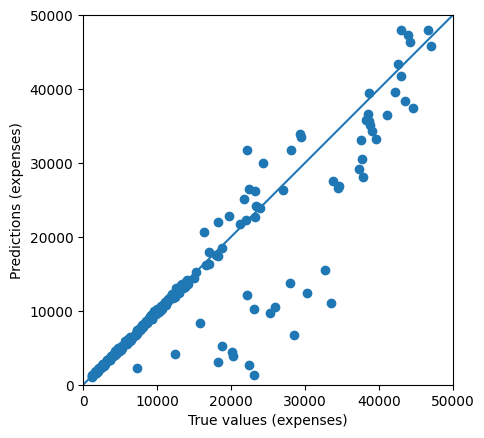

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
